# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
df.shape

(4008, 11)

In [4]:
df.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [5]:
df.columns = df.columns.str.lower()
df.rename(columns={'st': 'state'}, inplace=True)

print(df.columns)

Index(['customer', 'state', 'gender', 'education', 'customer lifetime value',
       'income', 'monthly premium auto', 'number of open complaints',
       'policy type', 'vehicle class', 'total claim amount'],
      dtype='object')


In [6]:
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)

Index(['customer', 'state', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [7]:
gender_count = df['gender'].value_counts()
gender_count

gender
F         457
M         413
Male       39
female     28
Femal      17
Name: count, dtype: int64

In [8]:
gender_mapping = {'Male': 'M', 'Female': 'F', 'male': 'M', 'female': 'F', 'Femal': 'F'}
df['gender'] = df['gender'].replace(gender_mapping)

In [9]:
gender_count = df['gender'].value_counts()
gender_count

gender
F    502
M    452
Name: count, dtype: int64

In [10]:
state_count = df['state'].value_counts()
state_count

state
Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: count, dtype: int64

In [11]:
state_mapping = {'WA': 'Washington', 'AZ': 'Arizona'}
df['state'] = df['state'].replace(state_mapping)
state_count = df['state'].value_counts()
state_count

state
Oregon        320
Arizona       211
California    211
Cali          120
Washington    111
Nevada         98
Name: count, dtype: int64

In [12]:
edu_mapping = {'Bachelors': 'Bachelor'}
df['education'] = df['education'].replace(edu_mapping)
edu_count = df['education'].value_counts()
edu_count

education
Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: count, dtype: int64

In [13]:
# had to do this as first:
df['customer_lifetime_value'] = df['customer_lifetime_value'].str.replace('%', '')
df['customer_lifetime_value'] = df['customer_lifetime_value'].astype(float)
df.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [14]:
#"Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"
class_mapping = {'Sports Car': 'Luxury', 'Luxury SUV': 'Luxury', 'Luxury Car': 'Luxury'}
df['vehicle_class'] = df['vehicle_class'].replace(class_mapping)
class_count = df['vehicle_class'].value_counts()
class_count

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: count, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [15]:
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [16]:
numeric_complaints = df['number_of_open_complaints'].unique()
print(numeric_complaints)
com_mapping = {'1/0/00': '0', '1/2/00': '2', '1/1/00': '1', '1/3/00': '3', '1/5/00': '5', '1/4/00': '4'}
df['number_of_open_complaints'] = df['number_of_open_complaints'].replace(com_mapping)

['1/0/00' '1/2/00' '1/1/00' '1/3/00' '1/5/00' '1/4/00' nan]


In [17]:
numeric_complaints = df['number_of_open_complaints'].unique()
print(numeric_complaints)

['0' '2' '1' '3' '5' '4' nan]


In [18]:
#1
def roundforme(x):
    return round(x,2)
#list(map(roundforme, summary['mean']))
summary['mean'] = list(map(roundforme, summary['mean']))
summary['mean']
#2



summary = data.describe().T
summary['iqr'] = summary['75%']-summary['25%']

summary['range'] = summary['max']-summary['min']

def roundforme(x):
    return round(x,2)


#summary['mean'] = summary['mean'].apply(lambda x : round(x, 2))

# summary
for col in summary.columns:
    summary[col] = summary[col].apply(lambda x : round(x, 2))
summary

NameError: name 'summary' is not defined

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [19]:
# Identify columns with nulls, and how many null values each column has.
null_counts = df.isnull().sum()
null_counts

customer                     2937
state                        2937
gender                       3054
education                    2937
customer_lifetime_value      2940
income                       2937
monthly_premium_auto         2937
number_of_open_complaints    2937
policy_type                  2937
vehicle_class                2937
total_claim_amount           2937
dtype: int64

In [20]:
#I decided to drop the rows with null values, as they're are 2937 in each column that has null values
df.dropna(inplace=True)
null_counts = df.isnull().sum()
null_counts

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [21]:
duplicate_rows = df[df.duplicated()]
duplicate_rows
#I have dropeed all null values, so I don't have any duplicates left.

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount


In [22]:
#Show DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 1 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   952 non-null    object 
 1   state                      952 non-null    object 
 2   gender                     952 non-null    object 
 3   education                  952 non-null    object 
 4   customer_lifetime_value    952 non-null    float64
 5   income                     952 non-null    float64
 6   monthly_premium_auto       952 non-null    float64
 7   number_of_open_complaints  952 non-null    object 
 8   policy_type                952 non-null    object 
 9   vehicle_class              952 non-null    object 
 10  total_claim_amount         952 non-null    float64
dtypes: float64(4), object(7)
memory usage: 89.2+ KB


In [23]:
#describe dataframe
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,9.520000e+02,952.000000,952.000000,952.000000
mean,7.942013e+05,39557.350840,205.231092,404.999156
std,6.258792e+05,30744.561851,1697.752504,299.238726
min,2.004351e+05,0.000000,61.000000,0.382107
25%,4.117836e+05,13087.750000,68.000000,196.724587
50%,5.885745e+05,36632.000000,83.000000,350.400000
75%,9.037509e+05,65085.500000,110.000000,534.000000
max,4.479547e+06,99960.000000,35354.000000,2893.239678


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Show a plot of the Gender breakdown
gender_counts = df['gender'].value_counts()
gender_counts

gender
F    501
M    451
Name: count, dtype: int64

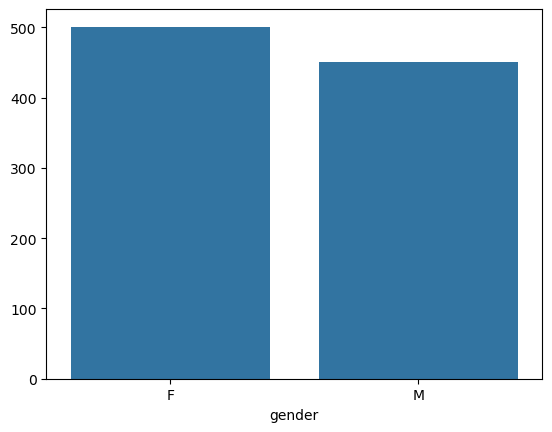

In [26]:
#Show a plot of the Gender breakdown
#index is the value names (m and f in this case)
#values is the occurances
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.show()

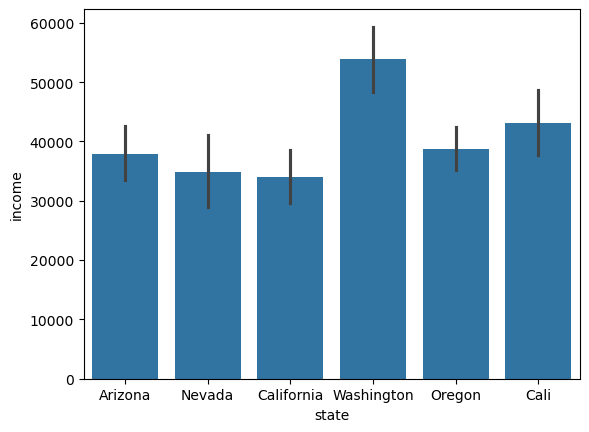

In [27]:
#Show a plot of Income by State
sns.barplot(x="state", y="income", data=df)
plt.show()

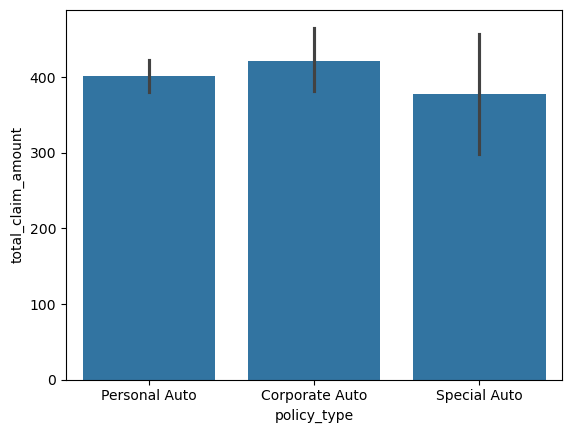

In [28]:
#Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x="policy_type", y="total_claim_amount", data=df)
plt.show()

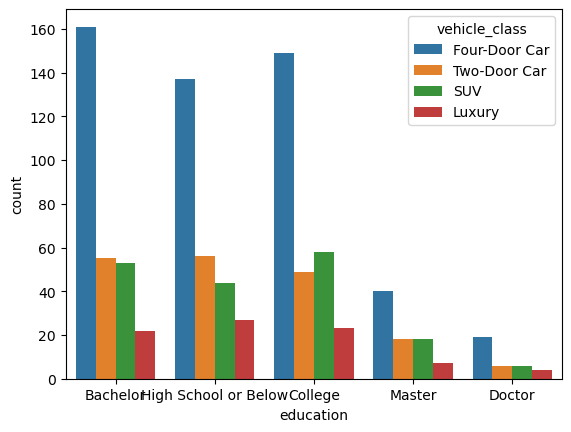

In [29]:
#Show a plot of the Education by Vehicle Class.
sns.countplot(x='education', hue='vehicle_class', data=df)
plt.show()

#What insights can you establish from these plots?
- we have slightly more female customers than male ones.
- Washington is the highest income state between our customers.
- special auto policy owners have the least claim amount.
- four door cars are the most common between people, diregarding their educational background.
- luxury are the least common between people, diregarding their educational background.
- people with college education tend to buy SUVs more than other people.

What other plots do you feel would be beneficial?
- maybe state by customer lifetime value would be beneficial.

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [ ]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [ ]:
# Your code here

In [30]:
#identify the types of columns, I've done this before but to have an overview
print(df.dtypes)

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object


In [31]:
#Get the numeric data into a dataframe called numerical
numerical = df.select_dtypes(include=np.number)

#Get the categorical columns in a dataframe called categorical
categorical = df.select_dtypes(include=['object'])  

In [32]:
list(numerical.columns)

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']

In [33]:
list(categorical.columns)

['customer',
 'state',
 'gender',
 'education',
 'number_of_open_complaints',
 'policy_type',
 'vehicle_class']

In [34]:
import matplotlib.pyplot as plt

C:\Users\m-syr\AppData\Local\Temp\ipykernel_30032\1691953503.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],bins=10)


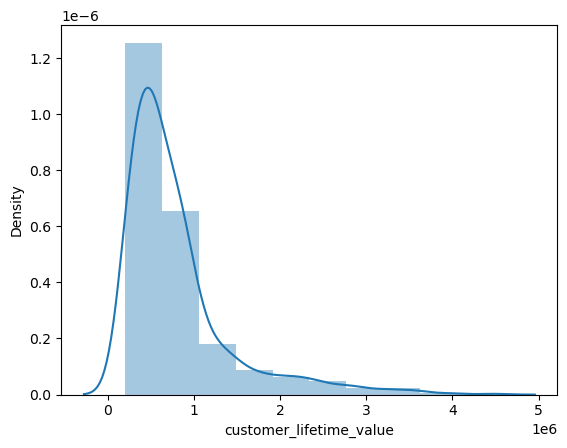

C:\Users\m-syr\AppData\Local\Temp\ipykernel_30032\1691953503.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],bins=10)


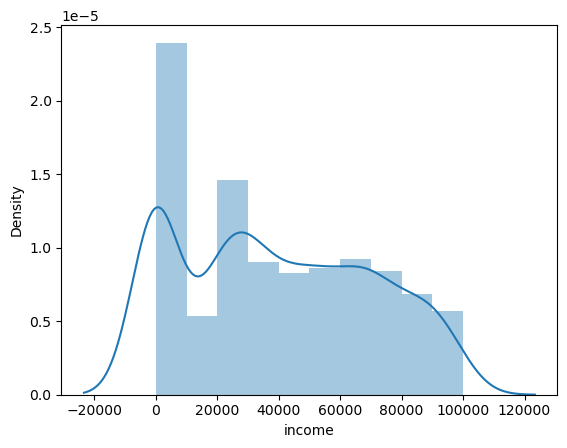

C:\Users\m-syr\AppData\Local\Temp\ipykernel_30032\1691953503.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],bins=10)


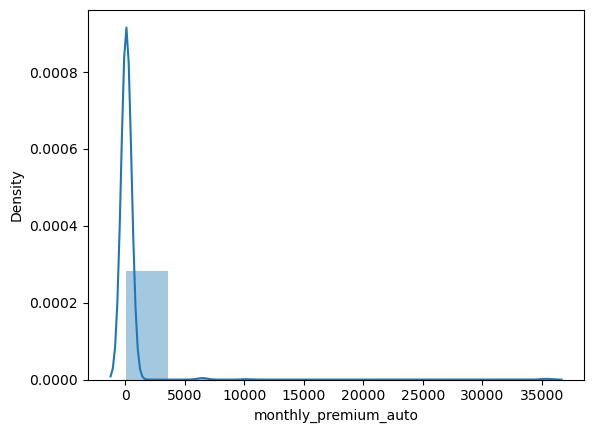

C:\Users\m-syr\AppData\Local\Temp\ipykernel_30032\1691953503.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[column],bins=10)


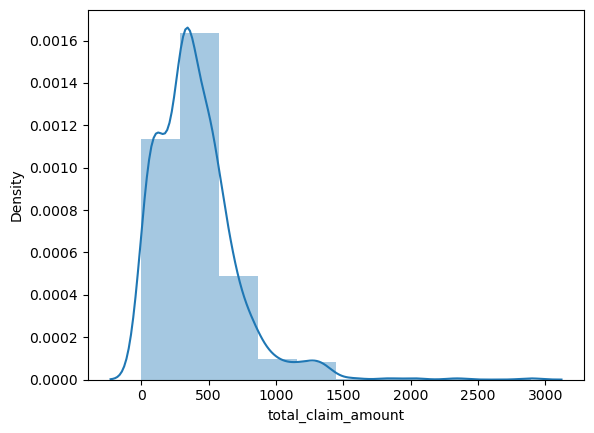

In [35]:
#Use seaborn library to construct distribution plots for the numerical variables
for column in numerical.columns:
    sns.distplot(numerical[column],bins=10)
    plt.show()

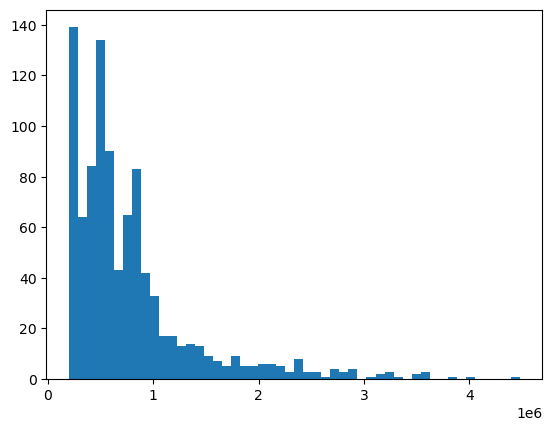

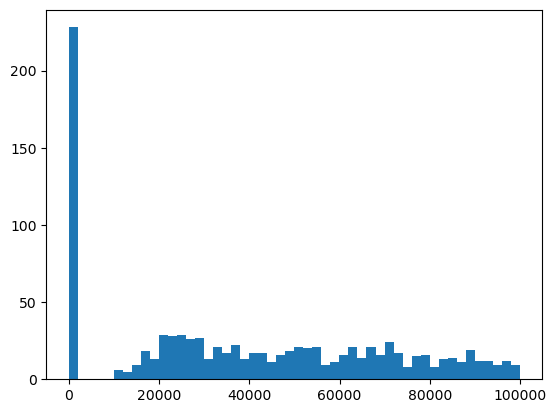

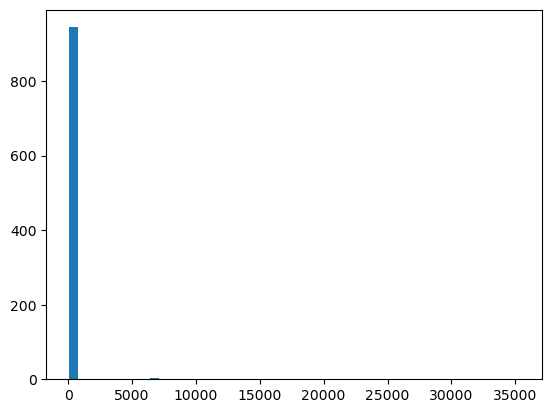

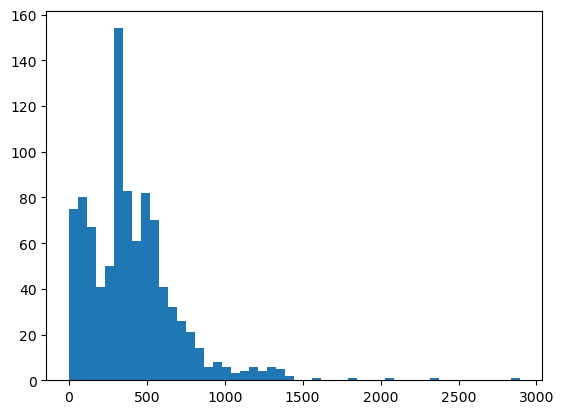

In [36]:
#Use Matplotlib to construct histograms
for column in numerical.columns:
    plt.hist(numerical[column],label=column,bins=50)
    plt.show()

In [ ]:
#visually we can say there's no normal distribution, none of the histograms has a bill shape.

In [45]:
#I'll check which variables have a strong correlation, then create the plot.
correlation_matrix = numerical.corr()
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            correlation = correlation_matrix.loc[col1, col2]
            if abs(correlation) >= 0.9:
                print(f"{col1} and {col2} have a strong correlation: {correlation:.2f}")
#we can see that we don't have any strong correlations in this module

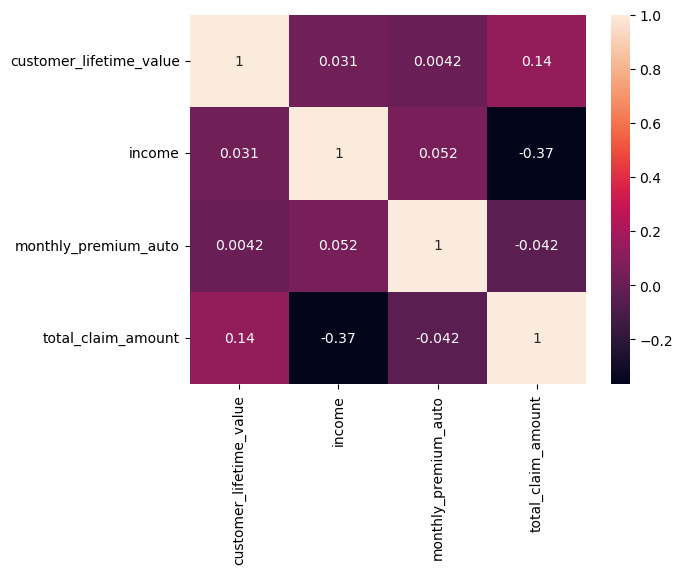

In [43]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [44]:
#since the highest correlation is 0.37, we don't need to drop any values.